## Latex to Json

In [2]:
import sys
import os

# Add the parent directory to the system path to access 'utils'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)



from utils.latex_to_json import tex_file_to_json
tex_file_to_json("/home/azureuser/cloudfiles/code/Users/omar.bayoumi/zerox/py_zerox/metric_data_examples/test.md")

JSON output saved to /home/azureuser/cloudfiles/code/Users/omar.bayoumi/zerox/py_zerox/metric_data_examples/test.json


## Standardize headings

In [ ]:
import json
from utils.heading_normalizer import load_and_validate_json, normalize_headings

gt_file = 'gt_json.json'
pred_file = 'pred_json.json'

gt_json = load_and_validate_json(gt_file)
pred_json = load_and_validate_json(pred_file)


# Assuming pred_json and gt_json are your input JSONs
updated_json, changes = normalize_headings(pred_json, gt_json)

# Save the updated JSON to a new file
updated_json_file = 'updated_pred_json.json'
with open(updated_json_file, 'w') as f:
    json.dump(updated_json, f, indent=4)
    print(f"Updated JSON saved to '{updated_json_file}'")   



# Print report of changes
print("Heading Normalization Report:")
print("-" * 50)
for change in changes:
    print(f"Original: {change['original']} ({change['original_type']})")
    print(f"Replaced with: {change['replaced_with']} ({change['matched_type']})")
    print(f"Similarity score: {change['similarity']:.2f}")
    print("-" * 50)

JSON file 'gt_json.json' loaded successfully
JSON file 'pred_json.json' loaded successfully
Updated JSON saved to 'updated_pred_json.json'
Heading Normalization Report:
--------------------------------------------------
Original: item1-Business (section)
Replaced with: item1 - Business (section)
Similarity score: 0.93
--------------------------------------------------
Original: Business visions (a) (subsection)
Replaced with: Business vision (subsection)
Similarity score: 0.91
--------------------------------------------------
Original:  - Strategy (subsubsection)
Replaced with: Strategy (subsection)
Similarity score: 0.89
--------------------------------------------------
Original:  - item 2 (a)- Risk (section)
Replaced with: item2 - Risk (section)
Similarity score: 0.83
--------------------------------------------------


## Text Block Extractor

In [5]:
from utils.textblock_extractor import extract_text
from utils.heading_normalizer import load_and_validate_json
test = load_and_validate_json('/home/azureuser/cloudfiles/code/Users/omar.bayoumi/zerox/py_zerox/metric_data_examples/test.json')
# Get the list of dictionaries with headings and concatenated text
output = extract_text(test)
print(output)


JSON file '/home/azureuser/cloudfiles/code/Users/omar.bayoumi/zerox/py_zerox/metric_data_examples/test.json' loaded successfully
{'Price Range of Our Common Stock and Preferred Stock': '\nOur common stock is traded actively Our common stock is traded actively Our common stock is traded actively \n\n\n', 'Dividends': '\nWe have not declared dividends on our common stock...\n\n', 'Shareholder Information': '\nOur shareholders are primarily based in the U.S...\n\n', 'Overview': '\nThe following table summarizes key financial data...\n\n', 'Financial Highlights': '\n2019 saw an increase in revenue by 15\\%...\n\nOur profit margins remained consistent with prior years...\n\n', 'Executive Officers': '\nThe company’s leadership team consists of seasoned professionals...\n\n', 'Governance Practices': '\nOur governance practices are designed to ensure compliance...\n\n', 'itemize': ' Ensure compliance with all relevant regulations.\n     Monitor industry trends for emerging risks.\n     Engage 

In [6]:

dict1 =   {
    "Price Range of Our Common Stock and Preferred Stock": "\nOur common sto",
    "Dividends": "\nWe have not de",
    "Shareholder Information": "\nOur shareholde",
    "Overview": "\nThe following ",
    "Financial Highlights": "\n2019 saw an in\\%...\n\nOur profit",
    "Executive Officers": "\nThe company’s ",
    "Governance Practices": "\nOur governance",
    "itemize": " Ensure compliance with all relevant regulations.\n Monitor industry trends for emerging risks.\n Engage with stakeholders to gather insights on potential threats.",
    "Governance": "\nwe do imp thin"
  }
dict2 =  {
    "Price Range of Our Common Stock and Preferred Stock": "\nOur common stock and preferred shares maintained a steady range throughout the fiscal period.",
    "Dividends": "\nNo dividends have been declared for this year, but the policy remains under consideration.",
    "Shareholder Information": "\nOur shareholder base and engagement efforts have expanded, reflecting positive growth.",
    "Overview and Summary": "\nThe following overview summarizes key annual achievements and financial performance.",
    "Financial Summary": "\nIn 2019, we observed an increase in profits by 10%... \n\nOur financial standing strengthened.",
    "Executive Officers": "\nOur leadership team comprises seasoned professionals with diverse industry backgrounds.",
    "Governance Practices": "\nOur governance practices are aligned with industry standards and regulatory requirements.",
    "itemize": "Ensure adherence to all applicable regulations.\n Monitor industry trends to preemptively address risks.\n Engage with stakeholders to stay informed on potential industry shifts.",
    "Governance": "\nEthical standards and governance principles are a top priority within our operations.",
    "Corporate Social Responsibility": "\nThe company has increased efforts in community engagement and environmental responsibility.",
    "Regulatory Compliance": "Ensure compliance with all updated regulatory requirements.\n Stay informed on industry developments and trends.\n Engage stakeholders to proactively identify potential threats."
  }



In [7]:
matching_values = []

common_keys = dict1.keys() & dict2.keys()
for key in common_keys:
    matching_values.append((dict1[key], dict2[key]))

for key in (dict1.keys() - dict2.keys()):
    matching_values.append((dict1[key], ""))

for key in (dict2.keys() - dict1.keys()):
    matching_values.append(("", dict2[key]))

print(matching_values)

[('\nWe have not de', '\nNo dividends have been declared for this year, but the policy remains under consideration.'), ('\nOur shareholde', '\nOur shareholder base and engagement efforts have expanded, reflecting positive growth.'), (' Ensure compliance with all relevant regulations.\n Monitor industry trends for emerging risks.\n Engage with stakeholders to gather insights on potential threats.', 'Ensure adherence to all applicable regulations.\n Monitor industry trends to preemptively address risks.\n Engage with stakeholders to stay informed on potential industry shifts.'), ('\nwe do imp thin', '\nEthical standards and governance principles are a top priority within our operations.'), ('\nOur common sto', '\nOur common stock and preferred shares maintained a steady range throughout the fiscal period.'), ('\nThe company’s ', '\nOur leadership team comprises seasoned professionals with diverse industry backgrounds.'), ('\nOur governance', '\nOur governance practices are aligned with i

In [9]:
from evaluation_metrics.text_similarity import calculate_rouge_metrics
rouge_values =calculate_rouge_metrics(matching_values)
print(rouge_values)

{'micro_scores_per_pair': [0.11, 0.15, 0.59, 0.0, 0.24, 0.0, 0.31, 0, 0, 0, 0, 0, 0], 'macro_rouge_l': 0.26, 'micro_average_rouge_l': 0.11}


In [10]:
from evaluation_metrics.text_similarity import calculate_bleu_metrics
bleu_values =calculate_bleu_metrics(matching_values)
print(bleu_values)

{'bleu_scores_per_pair': [0.0176, 0.0216, 0.2927, 0, 0.0413, 0, 0.0519, 0, 0, 0, 0, 0, 0], 'average_bleu': 0.0327}


## main

In [12]:
from evaluation_metrics.DAR import evaluate_hierarchy
try:
    metrics = evaluate_hierarchy('/home/azureuser/cloudfiles/code/Users/omar.bayoumi/zerox/py_zerox/metric_data_examples/test.json', '/home/azureuser/cloudfiles/code/Users/omar.bayoumi/zerox/py_zerox/metric_data_examples/test.json', print_details=True)
except Exception as e:
    print(f"Error during evaluation: {e}")

Ground truth JSON loaded successfully
Predicted JSON loaded successfully

=== EVALUATION SCORES ===


PARENT_CHILD SCORES:
--------------------
precision: 1.000
recall: 1.000
f1: 1.000
accuracy: 1.000

SIBLING SCORES:
---------------
precision: 1.000
recall: 1.000
f1: 1.000
accuracy: 1.000

COMBINED SCORES:
----------------
precision: 1.000
recall: 1.000
f1: 1.000
accuracy: 1.000

=== DETAILED RELATION ANALYSIS ===


PARENT_CHILD RELATIONS:

Ground Truth Relations:
--------------------
  Compliance and Risk Monitoring (Type: paragraph) → itemize (Type: itemize)
  Dividends (Type: subsubsection) → 
We have not declared dividends on our common stock...

 (Type: text)
  Dividends (Type: subsubsection) → Shareholder Information (Type: paragraph)
  Executive Officers (Type: subsection) → 
The company’s leadership team consists of seasoned professionals...

 (Type: text)
  Executive Officers (Type: subsection) → Governance  (Type: subsubsection)
  Executive Officers (Type: subsection) → Gove

JSON file '/home/azureuser/cloudfiles/code/Users/omar.bayoumi/zerox/py_zerox/metric_data_examples/test.json' loaded successfully


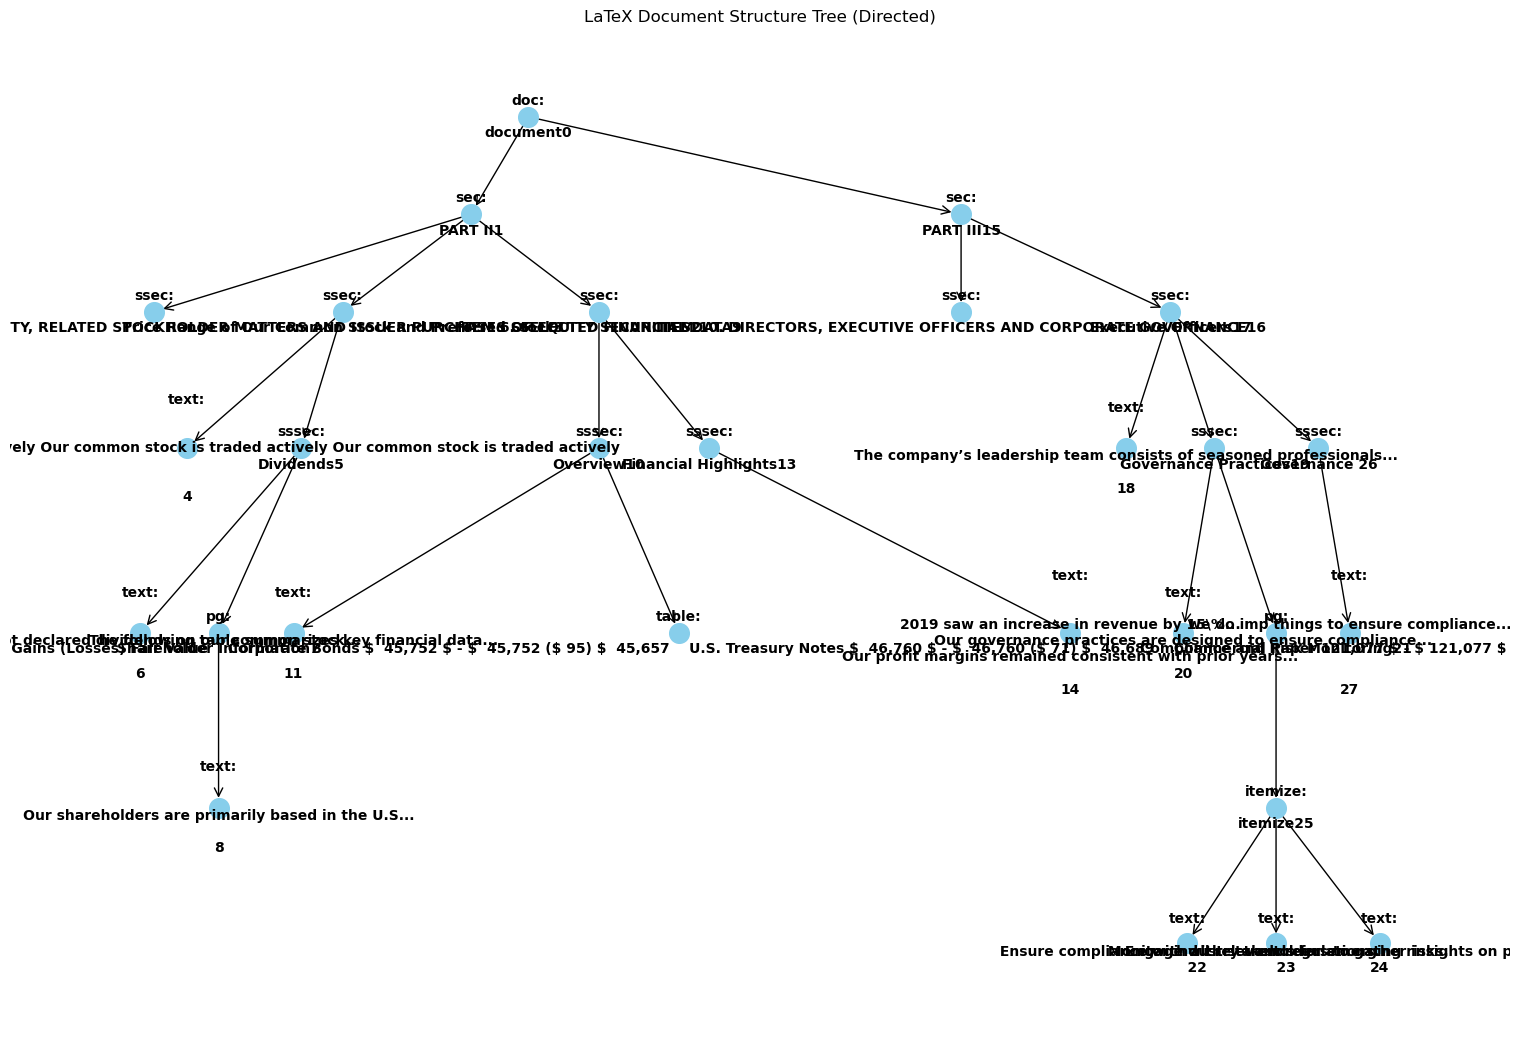

In [ ]:
from utils.graph_plotter import draw_dict
from utils.heading_normalizer import load_and_validate_json

# Example usage
file_path = '/home/azureuser/cloudfiles/code/Users/omar.bayoumi/zerox/py_zerox/metric_data_examples/test.json'
data_dict = load_and_validate_json(file_path)
draw_dict(data_dict)
